# SVM(Support Vector Machine)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

## Understanding SVM 

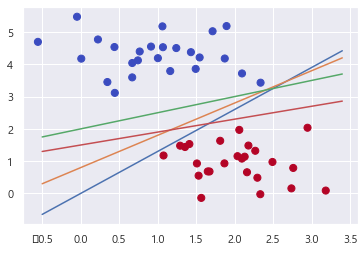

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');
X_fit = np.arange(-0.5, 3.5, 0.1)
plt.plot(X_fit, X_fit*1.3); plt.plot(X_fit, 0.8+X_fit*1);
plt.plot(X_fit, 2+X_fit*0.5);plt.plot(X_fit, 1.5+X_fit*0.4)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30); y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], 
               alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                 s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim); ax.set_ylim(ylim)

SVC(kernel='linear', random_state=11)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

array([[ 0.22967329, -1.37758262]])

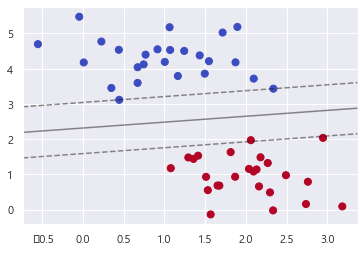

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=11)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);
model.support_vectors_; 
model.coef_

## What is kernel and kernel trick?

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

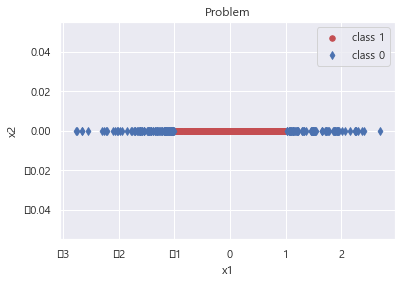

In [6]:
np.random.seed(0)
X = np.random.randn(500)
tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]
X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Problem')

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

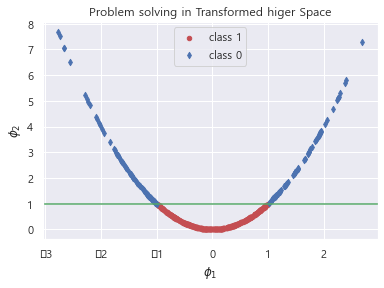

In [7]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=20)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=20)
plt.legend(); plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$')
plt.title('Problem solving in Transformed higer Space')
plt.axhline(y= tr, color='g', linestyle='-')

In [8]:
x = np.array([1,2,3]); y = np.array([4,5,6])
x_t = x.reshape(-1,1); x = x.reshape(1,-1)
q_x = x_t@x
q_x

y_t = y.reshape(-1,1); y = y.reshape(1,-1)
q_y = y_t@y
q_y

q_x * q_y
(q_x * q_y).sum()

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[16, 20, 24],
       [20, 25, 30],
       [24, 30, 36]])

array([[ 16,  40,  72],
       [ 40, 100, 180],
       [ 72, 180, 324]])

1024

In [9]:
x = np.array([1,2,3]); y = np.array([4,5,6])
sum((x*y))**2 # kernel function
np.dot(x,y)**2

1024

1024

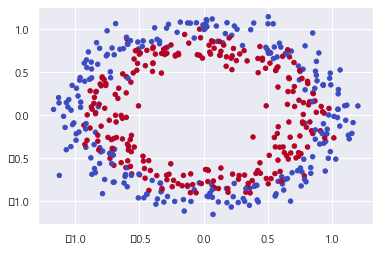

In [10]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

<Figure size 576x432 with 0 Axes>

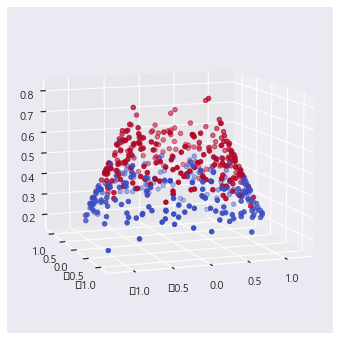

In [11]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

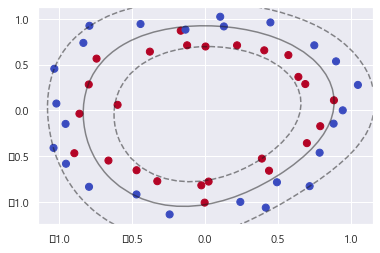

In [12]:
X, y = make_circles(n_samples=50, random_state=11, noise=0.1)
model = SVC(kernel='rbf')
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

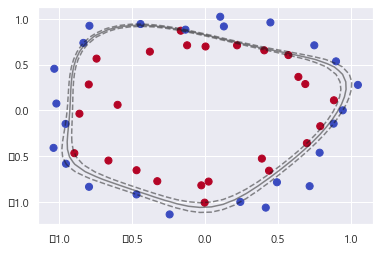

In [13]:
model = SVC(kernel='rbf', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

## 데이터 읽고 훈련시험 데이터 준비

In [14]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

## 서포트벡터머신

In [15]:
from sklearn.svm import SVC
np.random.seed(1357)

In [16]:
kf = KFold(n_splits=5)
params = {'C': np.arange(0.001, 1000, 10),
          'gamma': np.arange(0.001, 1000, 10),
          'kernel': ['linear', 'rbf']}
svc = SVC(max_iter=1000, random_state=11)
grid=RandomizedSearchCV(svc, params, cv=kf, 
                        scoring='recall_macro', verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.3s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(max_iter=1000, random_state=11),
                   param_distributions={'C': array([1.00000e-03, 1.00010e+01, 2.00010e+01, 3.00010e+01, 4.00010e+01,
       5.00010e+01, 6.00010e+01, 7.00010e+01, 8.00010e+01, 9.00010e+01,
       1.00001e+02, 1.10001e+02, 1.20001e+02, 1.30001e+02, 1.40001e+02,
       1.50001e+02, 1.60001e+...
       7.50001e+02, 7.60001e+02, 7.70001e+02, 7.80001e+02, 7.90001e+02,
       8.00001e+02, 8.10001e+02, 8.20001e+02, 8.30001e+02, 8.40001e+02,
       8.50001e+02, 8.60001e+02, 8.70001e+02, 8.80001e+02, 8.90001e+02,
       9.00001e+02, 9.10001e+02, 9.20001e+02, 9.30001e+02, 9.40001e+02,
       9.50001e+02, 9.60001e+02, 9.70001e+02, 9.80001e+02, 9.90001e+02]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='recall_macro', verbose=True)

In [17]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.502
test score: 0.506
optimal parameter: {'kernel': 'rbf', 'gamma': 420.001, 'C': 830.001}


In [18]:
model = grid.best_estimator_
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
y_predict[0:10]
y_scores[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

array([0.00083926, 0.00018052, 0.00018052, 0.00018052, 0.16037314,
       0.00018052, 0.00018052, 0.00018052, 0.00018052, 0.00018052])

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       522
           1       0.35      1.00      0.52       278

    accuracy                           0.36       800
   macro avg       0.68      0.51      0.27       800
weighted avg       0.77      0.35      0.20       800



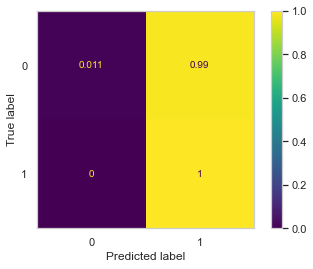

In [19]:
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

AUROC : 51.71
AP Mean : 35.99


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.36')

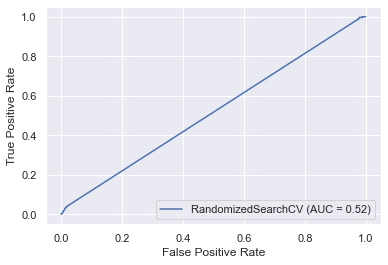

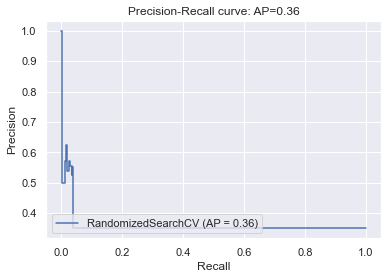

In [21]:
sns.set()
from sklearn.metrics import plot_precision_recall_curve
svc_disp = plot_roc_curve(grid, X_test, y_test)
ap = average_precision_score(y_test, y_scores)
svc_disp = plot_precision_recall_curve(grid, X_test, y_test)
svc_disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(ap))

In [22]:
dump(model, '../output/svc.joblib')

['../output/svc.joblib']

# END